In [1]:
import pandas as pd
import utilities

# Load EWKino and Bino-DM scan results as pandas dataframes

In [2]:
df_ewk = pd.read_csv('/eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/Run2/EW_Run2_data/EWKino.csv',index_col='Model_number')

In [3]:
df_bino = pd.read_csv('/eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/Run2/EW_Run2_data/Bino-DM.csv',index_col='Model_number')

/tmp/ipykernel_1558/2238306274.py:1: DtypeWarning: Columns (141,143,144,145) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bino = pd.read_csv('/eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/Run2/EW_Run2_data/Bino-DM.csv',index_col='Model_number')


# Selecting slices of models

### Applying external constraints

In [4]:
df_ewk_surviveExt = utilities.external_constraints(df_ewk,flavour=True,EW=True,DM=True)

2460 / 12280 models survive the external constraints


In [5]:
df_bino_surviveExt = utilities.external_constraints(df_bino,flavour=True,EW=True,DM=True)

1769 / 8897 models survive the external constraints


### Selecting models which are not excluded by ATLAS

In [6]:
df_ewk_surviveATLAS = utilities.ATLAS_exclude(df_ewk)

10017 / 12280 models survive ATLAS Run 2


In [7]:
df_bino_surviveATLAS = utilities.ATLAS_exclude(df_bino)

6381 / 8897 models survive ATLAS Run 2


### Other selections
Pandas boolean indexing (https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing) can be used to make other selections of models. 

As an example, let's say you're interested in models from the Bino-DM scan that are not excluded by ATLAS and pass non-DM external constraints, with $400\ \mathrm{GeV} <m(\chi_1^{\pm}) < 800\ \mathrm{GeV}$ and $0\ \mathrm{GeV}<m(\chi_1^{0})<500\ \mathrm{GeV}$. You also want to look at models where the $\chi_2^0\rightarrow h \chi_1^0$ decay mode is preferred. You could make this selection:

In [8]:
df_sel = utilities.ATLAS_exclude(df_bino)
df_sel = utilities.external_constraints(df_sel, flavour=True, EW=True, DM=True)
df_sel = df_sel[ (df_sel['m_chi_1p']>400) & (df_sel['m_chi_1p']<800) & (df_sel['m_chi_10']>0) & (df_sel['m_chi_10']<500) & (df_sel['BF_chi_20_to_chi_10_h']>0.5)]

6381 / 8897 models survive ATLAS Run 2
1415 / 6381 models survive the external constraints


Print some of the models which we've selected:

In [9]:
df_sel[['Final__CLs','BF_chi_20_to_chi_10_h','m_chi_1p','m_chi_10','Truth_ntuple']].head(15)

Final__CLs  BF_chi_20_to_chi_10_h   m_chi_1p   m_chi_10  \
Model_number                                                            
31                0.3400               0.905196  633.57040  334.01852   
117               0.4430               0.834378  490.54153  342.42760   
197               0.0731               0.528306  644.34314  292.03253   
315               0.5580               0.897372  646.54690  333.44992   
415               0.4310               0.799011  631.16626  349.88522   
430               0.8720               0.920171  568.64136  386.14380   
612               0.2280               0.928948  672.50586  389.84036   
937               0.6320               0.905309  701.18310  365.65005   
1159              0.7530               0.873885  558.72534  398.37380   
1392              0.7280               0.926368  603.08920  358.34012   
1410              0.4050               0.851679  746.97186  368.69467   
1495              0.4960               0.631626  678.09515  361.72110   
1593              0.4190               0.523810  516.05927  389.59546   
1609              0.2550               0.902977  640.93500  337.15875   
1632              0.6120               0.942290  578.43097  380.19190   

                                                   Truth_ntuple  
Model_number                                                     
31            /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
117           /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
197           /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
315           /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
415           /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
430           /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
612           /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
937           /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
1159          /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
1392          /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
1410          /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
1495          /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
1593          /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
1609          /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...  
1632          /eos/atlas/atlascerngroupdisk/phys-susy/pMSSM/...

# Accessing model files/samples of interest
Now we've got a selection of models, we want to access the available event samples and SLHA files.

### Write out paths to truth-level event samples
This will write out a .txt file containing the paths to truth-level ntuples for each model, which are stored in the `Truth_ntuple` column of the dataframe.

NOTE: These ntuples were produced without a filter. For a subset of models, an additional truth-level event sample was produced WITH an generator-level filter for improved statistics. Another column, `Truth_ntuple__FILTER` contains the paths to these, and the function `utilities.write_out_filter_ntuples` will write them out in the same way.

In [10]:
utilities.write_out_truth_ntuples(df_sel,'output/Bino-DM_truth_ntuples.txt')

73 Truth_ntuples written to output/Bino-DM_truth_ntuples.txt.


We can also write out the EOS location of the SLHA files for each model

In [11]:
utilities.write_out_SLHA(df_sel,'output/Bino-DM_SLHA_list.txt')

73 SLHAs written to output/Bino-DM_SLHA_list.txt.


### Select models for which reco-level MC production was run and write out the DSIDs and AOD names
For a subset of models, a reco-level MC production was also run. The `AOD` column tells you the AOD name (minus the r-tags), the `PRW` and `EVNT` columns similarly tell you the PRW and EVNT file names.
Also, the `DSID` column tells you the DSID.

In [12]:
df_sel_reco = utilities.get_reco_level_models(df_sel)

In [13]:
utilities.write_out_AODs(df_sel_reco,'output/Bino-DM_AOD_list.txt')
utilities.write_out_PRWs(df_sel_reco,'output/Bino-DM_PRW_list.txt')
utilities.write_out_EVNTs(df_sel_reco,'output/Bino-DM_EVNT_list.txt')
utilities.write_out_DSIDs(df_sel_reco,'output/Bino-DM_DSID_list.txt')

1 AODs written to output/Bino-DM_AOD_list.txt.
1 PRWs written to output/Bino-DM_PRW_list.txt.
1 EVNTs written to output/Bino-DM_EVNT_list.txt.
1 DSIDs written to output/Bino-DM_DSID_list.txt.


# Making plots
You might like to make 1D and 2D distributions of the models to analyse their properties. There are many ways to represent the results in this high-dimensional model space, but I have included a few function to get started.

### 1D plot
Here the `excl` parameter specifies which column is used to determine exclusion. By default this is `Final__CLs` -- the final CLs considering all analyses. If you wanted to look at the exclusion of a particular analysis, for example 2L0J, you could use `excl = 2L0J__ObsCLs`.

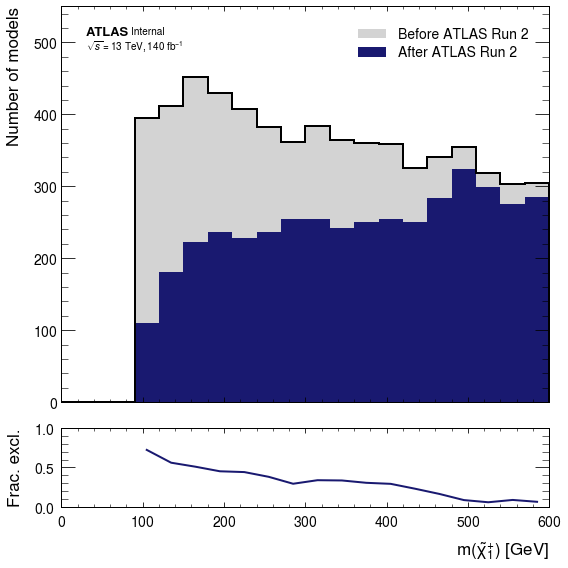

In [15]:
utilities.atlas1D(df_ewk,'m_chi_1p', saveTo='output/C1_EWKino.png', excl='Final__CLs', 
                  xlim=(0,600), nbins=20, ymin=None, ymax=None, logy=False, lgd_loc='upper right',
                 figsize=(8,8))

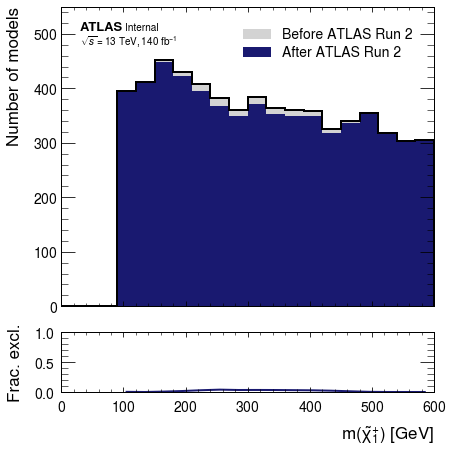

In [16]:
utilities.atlas1D(df_ewk,'m_chi_1p', excl='2L0J__ObsCLs', xlim=(0,600), nbins=20, ymin=None, ymax=None, logy=False, lgd_loc='upper right')

### 2D scatter plot
The colour of the points in your scatter plot is determined by the `colorBy` argument. 

* `colorBy = LSP_type` colors points by their LSP type.
* `colorBy = {A}_frac`, where `A = LSP / chi_{2,3,4}0 / chi_{1,2}p` colors the points with RGB value set to the wino/higgsino/bino fraction of the electroweakino specified by `A`.
* `colorBy` can also be set to any other column name to color the points by that column's values.

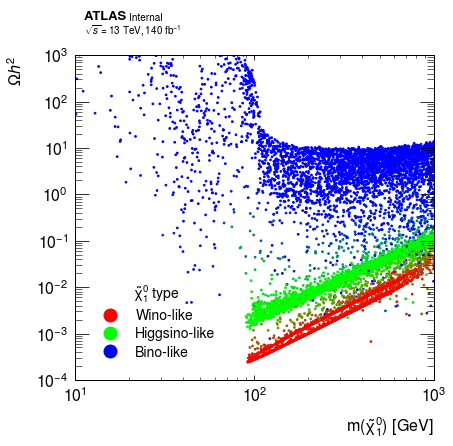

In [17]:
utilities.scatter2D(df_ewk, 'm_chi_10','DM_relic_density',saveTo='output/EWKino_DM__LSPfrac.png',xlim=(10,1000),ylim=(1e-4,1e3),xlog=True,ylog=True,colorBy='LSP_frac',lgd_loc='lower left',badge_loc=(0,0.9))

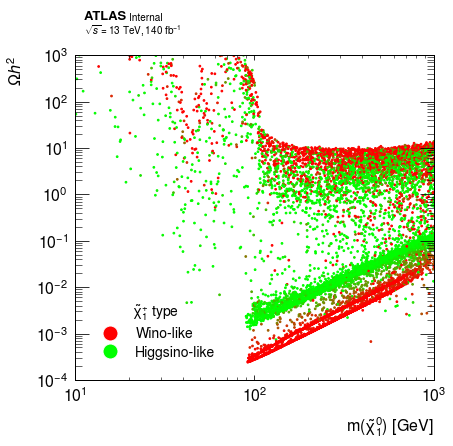

In [18]:
utilities.scatter2D(df_ewk, 'm_chi_10','DM_relic_density',xlim=(10,1000),ylim=(1e-4,1e3),xlog=True,ylog=True,colorBy='chi_1p_frac',lgd_loc='lower left',badge_loc=(0,0.9))

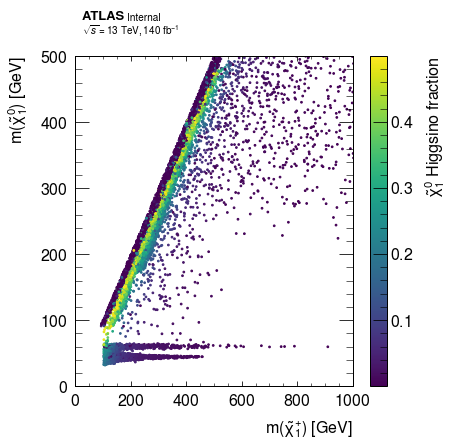

In [19]:
utilities.scatter2D(df_bino, xvar = 'm_chi_1p', yvar = 'm_chi_10', saveTo='output/C1_vs_N1_Bino-DM.png', xlim=(0,1000),ylim=(0,500),xlog=False,ylog=False,colorBy='LSP_Higgsino_frac',lgd_loc='upper left',badge_loc=(0,0.9))

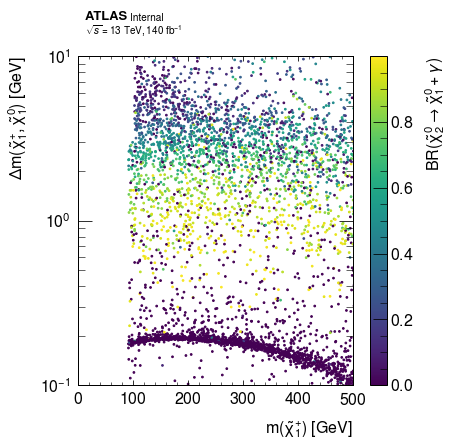

In [20]:
utilities.scatter2D(df_ewk, 'm_chi_1p','delta_m_chi_1p_m_chi_10',xlim=(0,500),ylim=(0.1,10),xlog=False,ylog=True,colorBy='BF_chi_20_to_chi_10_gam',lgd_loc='lower left',badge_loc=(0,0.9))

### 2D binned plot

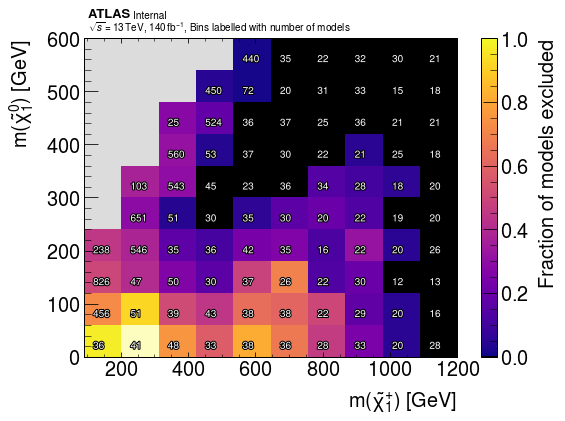

In [21]:
utilities.binned2D(
    df_ewk, 
    xvar = 'm_chi_1p', yvar = 'm_chi_10', xlim=(90,1200), ylim=(0,600), nxbins=10, nybins=10,
    
    zFunc = 'exclusion', # other options: 'count', '{max/mean/min}_{columnName}' (example below)
    zLabel = 'Fraction of models excluded', # label for color bar
    annFunc = 'count', annLabel='Bins labelled with number of models', # can use similar options as zFunc for labelling bins (example below)
    
    excl='Final__CLs', #column used to determine exclusion
)

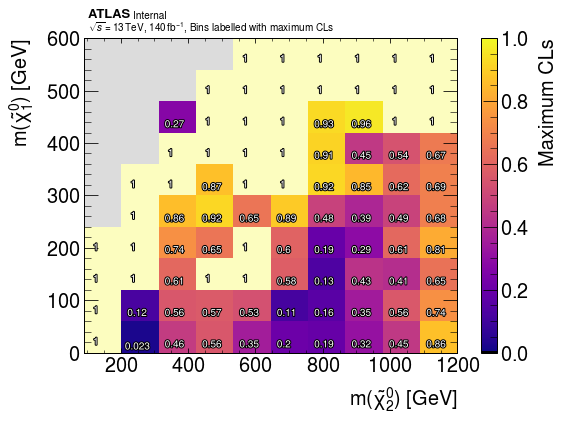

In [23]:
utilities.binned2D(
    df_ewk, 
    xvar = 'm_chi_20', yvar = 'm_chi_10', xlim=(90,1200), ylim=(0,600), nxbins=10, nybins=10,
    
    zFunc = 'max_Final__CLs', # maximum CLs value of the models in each bin
    zLabel = 'Maximum CLs', # label for color bar
    annFunc = 'max_Final__CLs', annLabel='Bins labelled with maximum CLs', # can use similar options as zFunc for labelling bins (example below)
    
    excl='Final__CLs', #column used to determine exclusion
)